# Trhlina v gradientní pružnosti

Načtení potřebných knihoven:

In [1]:
import sympy as sp

Nastavení *LaTEX*ovského výstupu:

In [2]:
sp.init_printing(use_unicode=False,use_latex=True)

Zavedení potřebných proměnných:

In [3]:
r=sp.symbols('r',real=True,positive=True)
phi=sp.symbols('varphi',real=True)
p=sp.symbols('p',complex=True)
nu,l=sp.symbols('nu lambda')
a0,b0,c0,d0=sp.symbols('a0 b0 c0 d0')
a1,b1,c1,d1=sp.symbols('a1 b1 c1 d1')
am1,bm1,cm1,dm1=sp.symbols('a_-1 b_-1 c_-1 d_-1')
a2,b2,c2,d2=sp.symbols('a2 b2 c2 d2')
am2,bm2,cm2,dm2=sp.symbols('a_-2 b_-2 c_-2 d_-2')
a3,b3,c3,d3=sp.symbols('a3 b3 c3 d3')
am3,bm3,cm3,dm3=sp.symbols('a_-3 b_-3 c_-3 d_-3')
a4,b4,c4,d4=sp.symbols('a4 b4 c4 d4')
a5,b5,c5,d5=sp.symbols('a5 b5 c5 d5')
Ur=sp.Function('U_r');Uphi=sp.Function('U_varphi')
V2r=sp.Function('V2_r');V3r=sp.Function('V3_r');V4r=sp.Function('V4_r')
V2phi=sp.Function('V2_varphi');V3phi=sp.Function('V3_varphi');V4phi=sp.Function('V4_varphi')

## Sestavení řešení diferanciální rovnice

Předpokládaný tvar řešení:

In [4]:
u_r=r**p*Ur(phi)
u_varphi=r**p*Uphi(phi)
u_r,u_varphi

Funkce

\begin{equation}
  s_r=2\left(1-\nu\right)\partial_{r}\left(\partial_{r}u_{r}+\frac{1}{r}u_{r}+\frac{1}{r}\partial_{\varphi}u_{\varphi}\right)-\left(1-2\nu\right)\frac{1}{r}\partial_{\varphi}\left(\partial_{r}u_{\varphi}-\frac{1}{r}\partial_{\varphi}u_{r}+\frac{1}{r}u_{\varphi}\right)
\end{equation}

po dosazení

\begin{equation}
  u_r(r,\varphi)=r^pU_r(r,\varphi),\quad u_{\varphi}(r,\varphi)=r^pU_{\varphi}(r,\varphi).
\end{equation}

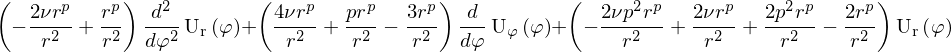

In [5]:
s_r=2*(1-nu)*sp.diff(u_r.diff(r)+1/r*u_r+1/r*u_varphi.diff(phi),r) \
    -(1-2*nu)*1/r*sp.diff(u_varphi.diff(r)-1/r*u_r.diff(phi)+1/r*u_varphi,phi)
s_r.expand().collect(Ur(phi)).collect(Uphi(phi))

Funkce

\begin{equation}
  s_{\varphi}=\left(1-2\nu\right)\partial_{r}\left(\partial_{r}u_{\varphi}+\frac{1}{r}u_{\varphi}-\frac{1}{r}\partial_{\varphi}u_{r}\right)+2\left(1-\nu\right)\frac{1}{r}\partial_{\varphi}\left(\partial_{r}u_{r}+\frac{1}{r}u_{r}+\frac{1}{r}\partial_{\varphi}u_{\varphi}\right)
\end{equation}

po dosazení

\begin{equation}
  u_r(r,\varphi)=r^pU_r(r,\varphi),\quad u_{\varphi}(r,\varphi)=r^pU_{\varphi}(r,\varphi).
\end{equation}

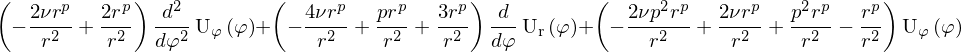

In [6]:
s_varphi=(1-2*nu)*sp.diff(u_varphi.diff(r)+1/r*u_varphi-1/r*u_r.diff(phi),r) \
         +2*(1-nu)*1/r*sp.diff(u_r.diff(r)+1/r*u_r+1/r*u_varphi.diff(phi),phi)
s_varphi.expand().collect(Ur(phi)).collect(Uphi(phi))

Dosazení funkcí $s_r$ a $s_{\varphi}$ do rovnice rovnováhy

\begin{equation}
  \nabla^{2}s_{r}-\frac{1}{r^{2}}s_{r}-2\frac{1}{r^{2}}\partial_{\varphi}s_{\varphi}=0,
\end{equation}

nebo-li

\begin{equation}
  \left(\partial_{rr}+\frac{1}{r}\partial_{r}+\frac{1}{r^{2}}\partial_{\varphi\varphi}\right)s_{r}-\frac{1}{r^{2}}s_{r}-2\frac{1}{r^{2}}\partial_{\varphi}s_{\varphi}=0.
\end{equation}


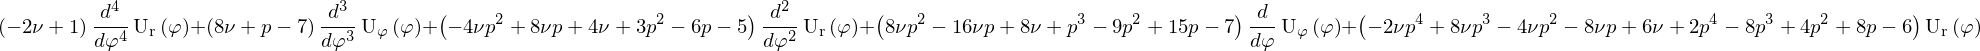

In [7]:
deqn1=s_r.diff(r,r)+1/r*s_r.diff(r)+1/r**2*s_r.diff(phi,phi)-1/r**2*s_r-2*1/r**2*s_varphi.diff(phi)
deqn1.expand().collect(Ur(phi)).collect(Uphi(phi)).subs(r,1)

Dosazení funkcí $s_r$ a $s_{\varphi}$ do rovnice rovnováhy

\begin{equation}
  \nabla^{2}s_{\varphi}-\frac{1}{r^{2}}s_{\varphi}+2\frac{1}{r^{2}}\partial_{\varphi}s_{r}=0,
\end{equation}

nebo-li

\begin{equation}
  \left(\partial_{rr}+\frac{1}{r}\partial_{r}+\frac{1}{r^{2}}\partial_{\varphi\varphi}\right)s_{\varphi}-\frac{1}{r^{2}}s_{\varphi}+2\frac{1}{r^{2}}\partial_{\varphi}s_{r}=0.
\end{equation}


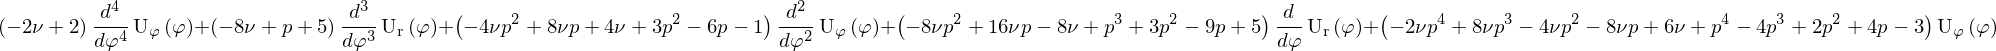

In [8]:
deqn2=s_varphi.diff(r,r)+1/r*s_varphi.diff(r)+1/r**2*s_varphi.diff(phi,phi)-1/r**2*s_varphi+2*1/r**2*s_r.diff(phi)
deqn2.expand().collect(Ur(phi)).collect(Uphi(phi)).subs(r,1)

Funkce $U_r(\varphi)$ a $U_{\varphi}(\varphi)$ se mají v obecném případě tvar,

\begin{equation}
  U_r(\varphi)=\sum_{i=1}^{\infty}a_{\pm i}\cos\left((p\mp i)\varphi\right)+b_{\pm i}\sin\left((p\mp i)\varphi\right)
\end{equation}

a

\begin{equation}
  U_{\varphi}(\varphi)=\sum_{i=1}^{\infty}c_{\pm i}\cos\left((p\mp i)\varphi\right)+d_{\pm i}\sin\left((p\mp i)\varphi\right).
\end{equation}


Dosazením jednotlivých členů řad do rovnic *deqn1* a *deqn2* se dostane:

- $i=1$, $U_r(\varphi)=a_1\cos\left((p-1)\varphi\right)+b_1\sin\left((p-1)\varphi\right)$ a $U_{\varphi}=c_1\cos\left((p-1)\varphi\right)+d_1\sin\left((p-1)\varphi\right)$

In [9]:
deqn11=deqn1.subs({Ur(phi):a1*sp.cos((p-1)*phi)+b1*sp.sin((p-1)*phi), \
                   Uphi(phi):c1*sp.cos((p-1)*phi)+d1*sp.sin((p-1)*phi),r:1}) \
       .doit().expand().collect((sp.cos((p-1)*phi),sp.sin((p-1)*phi)),evaluate=False)
deqn21=deqn1.subs({Ur(phi):a1*sp.cos((p-1)*phi)+b1*sp.sin((p-1)*phi), \
                   Uphi(phi):c1*sp.cos((p-1)*phi)+d1*sp.sin((p-1)*phi),r:1}) \
       .doit().expand().collect((sp.cos((p-1)*phi),sp.sin((p-1)*phi)),evaluate=False)
deqn11,deqn21

- $i=-1$, $U_r(\varphi)=a_{-1}\cos\left((p+1)\varphi\right)+b_{-1}\sin\left((p+1)\varphi\right)$ a $U_{\varphi}=c_{-1}\cos\left((p+1)\varphi\right)+d_{-1}\sin\left((p+1)\varphi\right)$

In [10]:
deqn1m1=deqn1.subs({Ur(phi):am1*sp.cos((p+1)*phi)+bm1*sp.sin((p+1)*phi), \
                    Uphi(phi):cm1*sp.cos((p+1)*phi)+dm1*sp.sin((p+1)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi+phi),sp.sin(p*phi+phi)),evaluate=False)
deqn2m1=deqn2.subs({Ur(phi):am1*sp.cos((p+1)*phi)+bm1*sp.sin((p+1)*phi), \
                    Uphi(phi):cm1*sp.cos((p+1)*phi)+dm1*sp.sin((p+1)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi+phi),sp.sin(p*phi+phi)),evaluate=False)
deqn1m1,deqn2m1

Opět, aby rovnice *deqn1m1* a *deqn2m1* byly nulové, musí být nulové výrazy u $\sin\left((p+1)\varphi\right)$ a $\cos\left((p+1)\varphi\right)$,

In [11]:
deqn1m11=deqn1m1[sp.sin(p*phi+phi)]
deqn1m12=deqn1m1[sp.cos(p*phi+phi)]
deqn1m13=deqn2m1[sp.sin(p*phi+phi)]
deqn1m14=deqn2m1[sp.cos(p*phi+phi)]
sp.solve([deqn1m11,deqn1m12,deqn1m13,deqn1m14],[am1,bm1,cm1,dm1])

- $i=2$, $U_r(\varphi)=a_2\cos\left((p-2)\varphi\right)+b_2\sin\left((p-2)\varphi\right)$ a $U_{\varphi}=c_2\cos\left((p-2)\varphi\right)+d_2\sin\left((p-2)\varphi\right)$

In [12]:
deqn12=deqn1.subs({Ur(phi):a2*sp.cos((p-2)*phi)+b2*sp.sin((p-2)*phi), \
                    Uphi(phi):c2*sp.cos((p-2)*phi)+d2*sp.sin((p-2)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi-2*phi),sp.sin(p*phi-2*phi)),evaluate=False)
deqn22=deqn2.subs({Ur(phi):a2*sp.cos((p-2)*phi)+b2*sp.sin((p-2)*phi), \
                    Uphi(phi):c2*sp.cos((p-2)*phi)+d2*sp.sin((p-2)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi-2*phi),sp.sin(p*phi-2*phi)),evaluate=False)
deqn12,deqn22

Opět, aby rovnice *deqn12* a *deqn22* byly nulové, musí být nulové výrazy u $\sin\left((p-2)\varphi\right)$ a $\cos\left((p-2)\varphi\right)$,

In [13]:
deqn121=deqn12[sp.sin(p*phi-2*phi)]
deqn122=deqn12[sp.cos(p*phi-2*phi)]
deqn123=deqn22[sp.sin(p*phi-2*phi)]
deqn124=deqn22[sp.cos(p*phi-2*phi)]
sp.solve([deqn121,deqn122,deqn123,deqn124],[a2,b2,c2,d2])

- $i=-2$, $U_r(\varphi)=a_{-2}\cos\left((p+2)\varphi\right)+b_{-2}\sin\left((p+2)\varphi\right)$ a $U_{\varphi}=c_{-2}\cos\left((p+2)\varphi\right)+d_{-2}\sin\left((p+2)\varphi\right)$

In [14]:
deqn1m2=deqn1.subs({Ur(phi):am2*sp.cos((p+2)*phi)+bm2*sp.sin((p+2)*phi), \
                    Uphi(phi):cm2*sp.cos((p+2)*phi)+dm2*sp.sin((p+2)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi+2*phi),sp.sin(p*phi+2*phi)),evaluate=False)
deqn2m2=deqn2.subs({Ur(phi):am2*sp.cos((p+2)*phi)+bm2*sp.sin((p+2)*phi), \
                    Uphi(phi):cm2*sp.cos((p+2)*phi)+dm2*sp.sin((p+2)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi+2*phi),sp.sin(p*phi+2*phi)),evaluate=False)
deqn1m2,deqn2m2

Opět, aby rovnice *deqn1m2* a *deqn2m2* byly nulové, musí být nulové výrazy u $\sin\left((p+2)\varphi\right)$ a $\cos\left((p+2)\varphi\right)$,

In [15]:
deqn1m21=deqn1m2[sp.sin(p*phi+2*phi)]
deqn1m22=deqn1m2[sp.cos(p*phi+2*phi)]
deqn1m23=deqn2m2[sp.sin(p*phi+2*phi)]
deqn1m24=deqn2m2[sp.cos(p*phi+2*phi)]
sp.solve([deqn1m21,deqn1m22,deqn1m23,deqn1m24],[am2,bm2,cm2,dm2])

- $i=3$, $U_r(\varphi)=a_3\cos\left((p-3)\varphi\right)+b_3\sin\left((p-3)\varphi\right)$ a $U_{\varphi}=c_3\cos\left((p-3)\varphi\right)+d_3\sin\left((p-3)\varphi\right)$

In [16]:
deqn13=deqn1.subs({Ur(phi):a3*sp.cos((p-3)*phi)+b3*sp.sin((p-3)*phi), \
                    Uphi(phi):c3*sp.cos((p-3)*phi)+d3*sp.sin((p-3)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi-3*phi),sp.sin(p*phi-3*phi)),evaluate=False)
deqn23=deqn2.subs({Ur(phi):a3*sp.cos((p-3)*phi)+b3*sp.sin((p-3)*phi), \
                    Uphi(phi):c3*sp.cos((p-3)*phi)+d3*sp.sin((p-3)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi-3*phi),sp.sin(p*phi-3*phi)),evaluate=False)
deqn13,deqn23

Opět, aby rovnice *deqn13* a *deqn23* byly nulové, musí být nulové výrazy u $\sin\left((p-3)\varphi\right)$ a $\cos\left((p-3)\varphi\right)$,

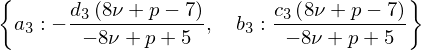

In [17]:
deqn131=deqn13[sp.sin(p*phi-3*phi)]
deqn132=deqn13[sp.cos(p*phi-3*phi)]
deqn133=deqn23[sp.sin(p*phi-3*phi)]
deqn134=deqn23[sp.cos(p*phi-3*phi)]
sp.solve([deqn131,deqn132,deqn133,deqn134],[a3,b3,c3,d3])

- $i=-3$, $U_r(\varphi)=a_{-3}\cos\left((p+3)\varphi\right)+b_{-3}\sin\left((p+3)\varphi\right)$ a $U_{\varphi}=c_{-3}\cos\left((p+3)\varphi\right)+d_{-3}\sin\left((p+3)\varphi\right)$

In [18]:
deqn1m3=deqn1.subs({Ur(phi):am3*sp.cos((p+3)*phi)+bm3*sp.sin((p+3)*phi), \
                    Uphi(phi):cm3*sp.cos((p+3)*phi)+dm3*sp.sin((p+3)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi+3*phi),sp.sin(p*phi+3*phi)),evaluate=False)
deqn2m3=deqn2.subs({Ur(phi):am3*sp.cos((p+3)*phi)+bm3*sp.sin((p+3)*phi), \
                    Uphi(phi):cm3*sp.cos((p+3)*phi)+dm3*sp.sin((p+3)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi+3*phi),sp.sin(p*phi+3*phi)),evaluate=False)
deqn1m3,deqn2m3

Opět, aby rovnice *deqn1m3* a *deqn2m3* byly nulové, musí být nulové výrazy u $\sin\left((p+3)\varphi\right)$ a $\cos\left((p+3)\varphi\right)$,

In [19]:
deqn1m31=deqn1m3[sp.sin(p*phi+3*phi)]
deqn1m32=deqn1m3[sp.cos(p*phi+3*phi)]
deqn1m33=deqn2m3[sp.sin(p*phi+3*phi)]
deqn1m34=deqn2m3[sp.cos(p*phi+3*phi)]
sp.solve([deqn1m31,deqn1m32,deqn1m33,deqn1m34],[am3,bm3,cm3,dm3])

- $i=4$, $U_r(\varphi)=a_4\cos\left((p-4)\varphi\right)+b_4\sin\left((p-4)\varphi\right)$ a $U_{\varphi}=c_4\cos\left((p-4)\varphi\right)+d_4\sin\left((p-4)\varphi\right)$

In [20]:
deqn14=deqn1.subs({Ur(phi):a4*sp.cos((p-4)*phi)+b4*sp.sin((p-4)*phi), \
                    Uphi(phi):c4*sp.cos((p-4)*phi)+d4*sp.sin((p-4)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi-4*phi),sp.sin(p*phi-4*phi)),evaluate=False)
deqn24=deqn2.subs({Ur(phi):a4*sp.cos((p-4)*phi)+b4*sp.sin((p-4)*phi), \
                    Uphi(phi):c4*sp.cos((p-4)*phi)+d4*sp.sin((p-4)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi-4*phi),sp.sin(p*phi-4*phi)),evaluate=False)
deqn14,deqn24

In [21]:
deqn141=deqn14[sp.sin(p*phi-4*phi)]
deqn142=deqn14[sp.cos(p*phi-4*phi)]
deqn143=deqn24[sp.sin(p*phi-4*phi)]
deqn144=deqn24[sp.cos(p*phi-4*phi)]
sp.solve([deqn141,deqn142,deqn143,deqn144],[a4,b4,c4,d4])

- $i=5$, $U_r(\varphi)=a_5\cos\left((p-5)\varphi\right)+b_5\sin\left((p-5)\varphi\right)$ a $U_{\varphi}=c_5\cos\left((p-5)\varphi\right)+d_5\sin\left((p-5)\varphi\right)$

In [22]:
deqn15=deqn1.subs({Ur(phi):a5*sp.cos((p-5)*phi)+b5*sp.sin((p-5)*phi), \
                    Uphi(phi):c5*sp.cos((p-5)*phi)+d5*sp.sin((p-5)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi-5*phi),sp.sin(p*phi-5*phi)),evaluate=False)
deqn25=deqn2.subs({Ur(phi):a5*sp.cos((p-5)*phi)+b5*sp.sin((p-5)*phi), \
                    Uphi(phi):c5*sp.cos((p-5)*phi)+d5*sp.sin((p-5)*phi),r:1}).doit(). \
       expand().collect((sp.cos(p*phi-5*phi),sp.sin(p*phi-5*phi)),evaluate=False)
deqn15,deqn25

In [23]:
deqn151=deqn15[sp.sin(p*phi-5*phi)]
deqn152=deqn15[sp.cos(p*phi-5*phi)]
deqn153=deqn25[sp.sin(p*phi-5*phi)]
deqn154=deqn25[sp.cos(p*phi-5*phi)]
sp.solve([deqn151,deqn152,deqn153,deqn154],[a5,b5,c5,d5])